In [4]:
#Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, random, shutil
import tensorflow as tf
import seaborn

In [59]:
# paths to the archives
base_path = r'../input/galaxy-zoo-the-galaxy-challenge/'
training_solutions = os.path.join(base_path, 'training_solutions_rev1.zip')
training_images    = os.path.join(base_path, 'images_training_rev1.zip')

In [60]:
df = pd.read_csv(training_solutions, compression="zip")
cols = df.columns
new = list(map(lambda s: s.replace('Class','Q'), cols))
df.columns = new
df.head()

,GalaxyID,Q1.1,Q1.2,Q1.3,Q2.1,Q2.2,Q3.1,Q3.2,Q4.1,Q4.2,...,Q9.3,Q10.1,Q10.2,Q10.3,Q11.1,Q11.2,Q11.3,Q11.4,Q11.5,Q11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


### Class Segregation
***
The columns from the above dataset signifies the actual classes, considering both computations and my novice knowledge, I'm restricting the classes to three types which are root categories anyway

In [91]:
ellipticals = df[(df['Q1.1']>0.7) & (df['Q7.1']>0.4)]['GalaxyID'].tolist()
lenticulars = df[(df['Q1.1']>0.7) & (df['Q7.2']>0.4)]['GalaxyID'].tolist()
spirals = df[(df['Q1.2']>0.7) & (df['Q2.1']>0.4)]['GalaxyID'].tolist()

print('Total number of elliptical examples: ',  len(ellipticals))
print('Total number of lenticular examples: ',  len(lenticulars))
print('Total number of spiral examples: ',  len(spirals))


Total number of elliptical examples:  7311
Total number of lenticular examples:  6625
Total number of spiral examples:  4635


Taking only 500 random samples from each category

In [92]:
def return500(category):
    category = np.array(category)
    rn_500 = sorted(list(np.random.randint(1,4500,500)))
    return list(category[rn_500])
    
ellipticals = return500(ellipticals)
lenticulars = return500(lenticulars)
spirals = return500(spirals)

In [93]:
len(spirals)

500

### Test and Validation Splits

In [98]:
# This subroutine is lifted from a kaggle notebook 
def _proc_images(src, dst, label, arr, percent):
    train_dir = os.path.join(dst, 'train')
    val_dir = os.path.join(dst, 'validation')
    
    train_dest = os.path.join(train_dir, label)
    val_dest   = os.path.join(val_dir, label)
    
    if not os.path.exists(train_dest):
        os.makedirs(train_dest)

    if not os.path.exists(val_dest):
        os.makedirs(val_dest)
    
    random.shuffle(arr)
    
    idx = int(len(arr)*percent)
    for i in arr[0:idx]:
        shutil.copyfile(os.path.join(src, str(i)+'.jpg'), os.path.join(train_dest, str(i)+'.jpg'))
    for i in arr[idx:]:
        shutil.copyfile(os.path.join(src, str(i)+'.jpg'), os.path.join(val_dest, str(i)+'.jpg'))
    
    print(label, 'done!')
    

In [99]:
training_solutions = os.path.join(base_path, 'training_solutions_rev1')
training_images    = os.path.join(base_path, 'images_training_rev1')

In [100]:
my_data = '/Users/Shared/Relocated/Security/Codes/Deep_Learning/input/galaxy-zoo-clean/data'

In [101]:
_proc_images(training_images, '../input/galaxy-zoo-clean/data/', 'elliptical', ellipticals, 0.90)
_proc_images(training_images,'../input/galaxy-zoo-clean/data/', 'lenticular', lenticulars, 0.90)
_proc_images(training_images, '../input/galaxy-zoo-clean/data/', 'spiral', spirals, 0.90)


print('Elliptical:', len(os.listdir(os.path.join(my_data, 'train', 'elliptical'))))
print('Total train lenticular:', len(os.listdir(os.path.join(my_data, 'train', 'lenticular'))))
print('Total train spiral:', len(os.listdir(os.path.join(my_data, 'train', 'spiral'))))


print('Total validation elliptical:', len(os.listdir(os.path.join(my_data, 'validation', 'elliptical'))))
print('Total validation lenticular:', len(os.listdir(os.path.join(my_data, 'validation', 'lenticular'))))
print('Total validation spiral:', len(os.listdir(os.path.join(my_data, 'validation', 'spiral'))))


elliptical done!
lenticular done!
spiral done!
Elliptical: 425
Total train lenticular: 431
Total train spiral: 433
Total validation elliptical: 49
Total validation lenticular: 50
Total validation spiral: 50


In [5]:
train_dir = '../input/galaxy-zoo-clean/data/train'
validation_dir = '../input/galaxy-zoo-clean/data/validation'

In [30]:
total_train = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_train += len(os.listdir(os.path.join(train_dir, c)))
print('Total train:', total_train)

total_validation = 0
for c in ['elliptical', 'lenticular', 'spiral']:
  total_validation += len(os.listdir(os.path.join(validation_dir, c)))
print('Total validation:', total_validation)

Total train: 1289
Total validation: 149


### Data Overview

In [31]:
from PIL import Image
import random
def return_imgarr(train_dir,label):
    img_arr = []
    paths = os.listdir(os.path.join(train_dir,label))
    
    for num, file in enumerate(random.choices(paths,k=3)):
        pic = Image.open(os.path.join(train_dir,label,file))
        img_arr.append(np.array(pic))

    return img_arr


In [32]:
elliptical_arr = return_imgarr(train_dir,label='elliptical')
lenticular_arr = return_imgarr(train_dir, label='lenticular')
spiral_arr = return_imgarr(train_dir, label='spiral')

### ***Three Random Samples of Elliptical Galaxies***

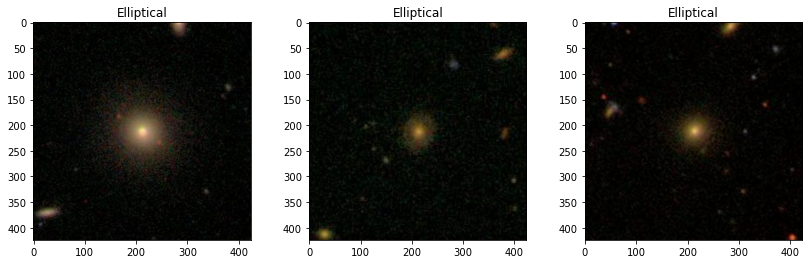

In [33]:
fig,ax = plt.subplots(1,3,figsize=(14,4))

for i, ax in enumerate(ax.ravel()):
    ax.set_title("Elliptical".format(i)) 
    ax.imshow(elliptical_arr[i])

### ***Three Random Samples of Leticular Galaxies***

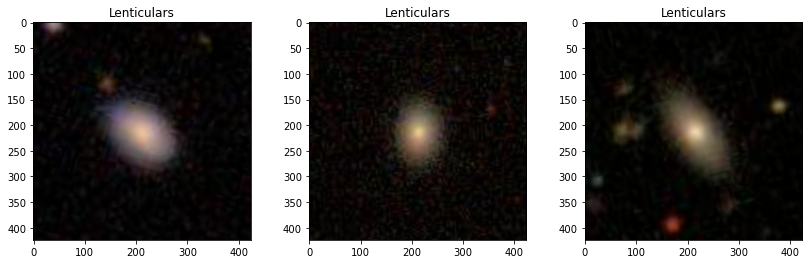

In [34]:
fig,ax = plt.subplots(1,3,figsize=(14,4))

for i, ax in enumerate(ax.ravel()):
    ax.set_title("Lenticulars".format(i)) 
    ax.imshow(lenticular_arr[i])

### ***Three Random Samples of Spiral Galaxies***

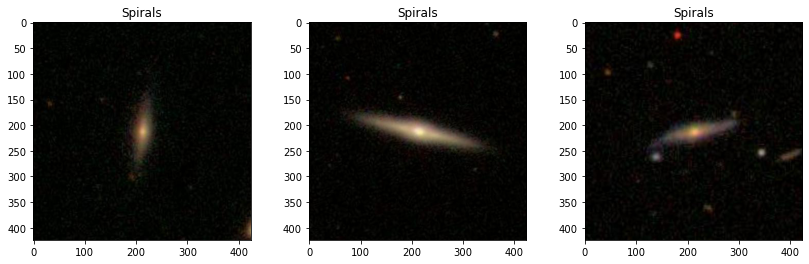

In [35]:
fig,ax = plt.subplots(1,3,figsize=(14,4))

for i, ax in enumerate(ax.ravel()):
    ax.set_title("Spirals".format(i)) 
    ax.imshow(spiral_arr[i])

### Image Generators

In [7]:
BS = 64 # batch_size
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=25,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.2)
validation_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(180,180),
                                                    batch_size=BS,
                                                    shuffle=True,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(180,180),
                                                         batch_size=BS,
                                                         shuffle=True,
                                                         class_mode='categorical')

Found 1289 images belonging to 3 classes.
Found 149 images belonging to 3 classes.


In [8]:
# Required Layer artefacts
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [9]:
train_generator.image_shape

(180, 180, 3)

In [83]:
from tensorflow.keras.applications import InceptionV3

In [109]:
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=train_generator.image_shape)

In [110]:
# Freezing the Weights
for layer in inception.layers:
    layer.trainable = False


In [111]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 89, 89, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 89, 89, 32)   96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 89, 89, 32)   0           batch_normalization_282[0][0]    
_______________________________________________________________________________________

In [112]:
model = Sequential()
model.add(inception)
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation='softmax'))

In [113]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 4, 4, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               16777728  
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [114]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#callbacks 
early_stop = EarlyStopping(monitor = 'val_accuracy', patience=3)

In [115]:

import time

start = time.perf_counter()

model.fit(train_generator, epochs=30, validation_data=validation_generator,callbacks=[early_stop])

elapsed = time.perf_counter() - start                  
                 
                   

Epoch 1/30
21/21 [==============================] - 39s 2s/step - loss: 3.0289 - accuracy: 0.3841 - val_loss: 0.9531 - val_accuracy: 0.4362
Epoch 2/30
21/21 [==============================] - 42s 2s/step - loss: 1.0111 - accuracy: 0.4777 - val_loss: 0.7067 - val_accuracy: 0.5705
Epoch 3/30
21/21 [==============================] - 35s 2s/step - loss: 0.8604 - accuracy: 0.5536 - val_loss: 0.6962 - val_accuracy: 0.5705
Epoch 4/30
21/21 [==============================] - 40s 2s/step - loss: 0.7697 - accuracy: 0.5776 - val_loss: 0.6254 - val_accuracy: 0.6309
Epoch 5/30
21/21 [==============================] - 36s 2s/step - loss: 0.7364 - accuracy: 0.6293 - val_loss: 0.5875 - val_accuracy: 0.6443
Epoch 6/30
21/21 [==============================] - 35s 2s/step - loss: 0.7181 - accuracy: 0.6244 - val_loss: 0.6263 - val_accuracy: 0.6443
Epoch 7/30
21/21 [==============================] - 42s 2s/step - loss: 0.7045 - accuracy: 0.6436 - val_loss: 0.5552 - val_accuracy: 0.6510
Epoch 8/30
21/21 [==

In [121]:
import pandas as pd
history = pd.DataFrame(model.history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,2.179312,0.418154,0.953067,0.436242
1,0.961773,0.522110,0.706701,0.570470
2,0.829118,0.577192,0.696200,0.570470
3,0.753635,0.591932,0.625395,0.630872
4,0.750024,0.617533,0.587511,0.644295
5,0.718781,0.623739,0.626285,0.644295
6,0.707123,0.631497,0.555202,0.651007
7,0.694791,0.630722,0.551940,0.677852
8,0.654065,0.645462,0.612667,0.644295
9,0.806783,0.613654,0.597448,0.671141


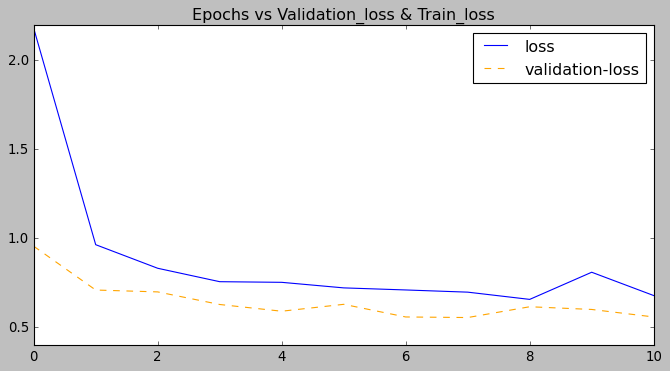

In [129]:
plt.style.use('classic')
plt.figure(figsize=(10,5))
plt.plot(history['loss'],label='loss')
plt.plot(history['val_loss'],ls='--',color='orange',label='validation-loss')
plt.title('Epochs vs Validation_loss & Train_loss')
plt.legend()

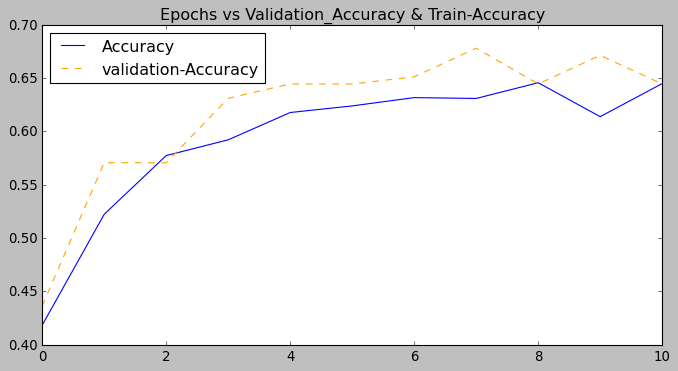

In [132]:
plt.style.use('classic')
plt.figure(figsize=(10,5))
plt.plot(history['accuracy'],label='Accuracy')
plt.plot(history['val_accuracy'],ls='--',color='orange',label='validation-Accuracy')
plt.title('Epochs vs Validation_Accuracy & Train-Accuracy')
plt.legend(loc='upper left')

In [133]:
predictions = model.predict_classes(validation_generator)

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [134]:
predictions

array([0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0])

In [139]:
# saving model
model.save('inception-model.h5')

In [137]:
# Deconstructing Validation Set as x_test, and y_test for classification report

In [236]:
x_train, y_train = next(train_generator)
x_test, y_test = next(validation_generator)
class_names = validation_generator.class_indices

In [237]:
y_test[index].argmax()

2

In [238]:
x_test.shape

(64, 180, 180, 3)

Text(0.5, 1.0, 'spiral')

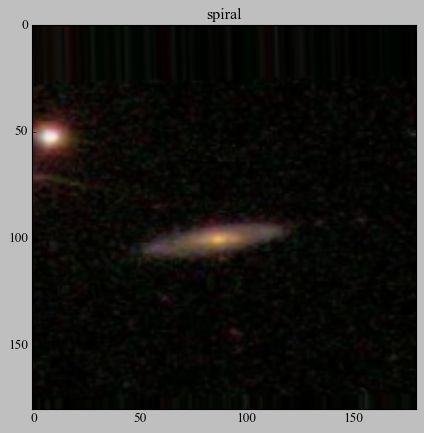

In [227]:
index = 63
plt.imshow(x_test[index])
plt.title(list(class_names.keys())[y_test[index].argmax()])

In [228]:
predictions

array([0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0])

In [248]:
predictions = model.predict_classes(x_train)

/Users/rohan/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [242]:
y_test = np.array([np.where(r==1)[0][0] for r in y_test])

In [243]:
y_test

array([1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0,
       0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1,
       1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2])

In [245]:
len(y_train)

64

In [250]:
from sklearn.metrics import classification_report,confusion_matrix

In [256]:
history

,loss,accuracy,val_loss,val_accuracy
0,2.179312,0.418154,0.953067,0.436242
1,0.961773,0.522110,0.706701,0.570470
2,0.829118,0.577192,0.696200,0.570470
3,0.753635,0.591932,0.625395,0.630872
4,0.750024,0.617533,0.587511,0.644295
5,0.718781,0.623739,0.626285,0.644295
6,0.707123,0.631497,0.555202,0.651007
7,0.694791,0.630722,0.551940,0.677852
8,0.654065,0.645462,0.612667,0.644295
9,0.806783,0.613654,0.597448,0.671141


### Load Model

In [10]:
from tensorflow.keras.models import load_model

In [11]:
inceptionNet = load_model('inception-model.h5')

In [15]:
inceptionNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 4, 4, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               16777728  
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

### Miscellaneous

In [17]:
import os
path = '../samples/'
overview_path = '../samples/overview.txt'
eval_path  = '../samples/evaluate.txt'

if os.path.exists(path):

    print('samples dir, exists..checking for dictionaries existence..')

    if os.path.exists(overview_path) and os.path.exists(eval_path):
        print('Data exists. no need of overwritting.')
    else:
        print("overview and eval doesn't exist, proceed to step-2")

else:
    print("samples/ dir is non-existent, Establishing one..")
    os.mkdir(path) # samples directory 



samples dir, exists..checking for dictionaries existence..
overview and eval doesn't exist, proceed to step-2


In [21]:
shape = (train_generator.samples,*train_generator.image_shape)
shape

(1289, 180, 180, 3)

In [23]:
train_generator.class_indices.values()

dict_values([0, 1, 2])

In [37]:
sample = list()
sample.append(elliptical_arr[0])
sample.append(lenticular_arr[0])
sample.append(spiral_arr[1])

In [39]:
sample = np.array(sample)

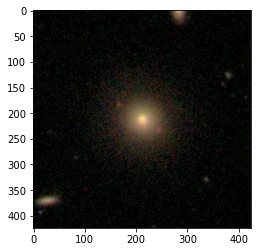

In [44]:
x_test, y_test = next(validation_generator)

In [73]:


# dictionary init
overview_dict = {}
eval_dict = {}

# fill the following - 
# for overview
#string
kind = 'Image Data'
#tuple
dimensions = shape
#labels : str(list of unique target values)
targets = list(train_generator.class_indices.values())
#nd.array        
data = sample
#nd.array or class_names
labels = ['elliptical','lenticular','spiral']

vars0 = ['kind','dimensions', 'targets', 'data', 'labels']

# filling overview_dict 
for x in vars0:
    try:
        overview_dict[x] = eval(x)
    except:
        overview_dict[x] = x

# evaluate_dict 

eval_dict = {'test_cases' : x_test, 'true': y_test, 'class_names': list(validation_generator.class_indices.keys())  ,'model':'/inceptionv3-model.h5'}


In [77]:
import pickle
# dump 1 
with open(overview_path,'wb') as f:
    pickle.dump(overview_dict,f)

# dump 2 
with open(eval_path,'wb') as f:
    pickle.dump(eval_dict,f)


In [ ]:
# desc-----string
# project_name-----string
# framework-----string
# prediction_type-----string
# network_type-----string
# architecture-----model()
# layers-----int
# hidden_units-----int
# activations-----string(list)
# epochs-----int
# metrics-----string(list)
# loss-----string
# optimiser-----string
# learning_rate-----float
# batch_size-----int/string
# train_performance-----float
# test_performance-----float
# classification_report-----string
# elapsed-----float
# summary-----string
# ipynb-----path
# plots-----path

In [81]:
inceptionNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 4, 4, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               16777728  
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [82]:
synopsis = '''Considering my computation limitations as well as being a neophyte to use pre-trained networks, working on this project was quite challenging for me. This dataset was sliced down to a considerable amount to train an InceptionV3 with Imagenet weights. This implementation shows the quick efficiency that Transfer Learning delivers. My analogy for only getting a 60% accuracy is ideally because of using only 500 samples of each class instead of the original amount which is over 5000 samples for each class.'''

In [94]:
desc = '''The Galaxy Zoo Project is an ensembled collection of Images of different classes of Galaxies cateogorised based on their Morphology. Data collection is a part of Sloan Digital Sky Survey. six categories include - elliptical, clockwise spiral, anticlockwise spiral, edge-on , lenticular, or merger.'''
project_name = 'Galaxy Classification'
framework = 'Keras'
prediction_type = 'Classification of 3 Classes'
network_type = 'INCEPTION-V3'
architecture = str(inceptionNet.summary())
layers = 'InceptionV3 (48) + 7 Layers'
hidden_units = 'None'
activations = "['relu','softmax']"
epochs = '30, with earlystopping(patience=3) - trained for 8 epochs'
metrics = 'Accuracy'
loss = 'Categorical Cross-Entropy'
optimiser = 'Adam'
learning_rate = 0.001
batch_size = 64
train_performance = '64.32%'
test_performance = '64.46%'
classification_report = 'None'
elapsed = '23.4 Mins'
summary = synopsis
ipynb = './Projects/galaxy-classifier/galaxy-classifier-Inceptionv3.ipynb'
plots = './Projects/galaxy-classifier/Plots'

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 4, 4, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               16777728  
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [95]:

var = ['desc','project_name', 'framework','prediction_type','network_type',
'architecture','layers','hidden_units','activations','epochs',
'metrics','loss','optimiser','learning_rate','batch_size','train_performance','test_performance','classification_report','elapsed','summary'
,'ipynb','plots']
param = {}
for val in var:

    try: 
        param[val] = eval(val)

    except:
        param[val] = val




In [98]:
s = '''
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
inception_v3 (Functional)    (None, 4, 4, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               16777728  
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 195       
=================================================================
Total params: 38,728,483
Trainable params: 16,925,699
Non-trainable params: 21,802,784
_________________________________________________________________

'''

In [103]:
param

{'desc': 'The Galaxy Zoo Project is an ensembled collection of Images of different classes of Galaxies cateogorised based on their Morphology. Data collection is a part of Sloan Digital Sky Survey. six categories include - elliptical, clockwise spiral, anticlockwise spiral, edge-on , lenticular, or merger.',
 'project_name': 'Galaxy Classification',
 'framework': 'Keras',
 'prediction_type': 'Classification of 3 Classes',
 'network_type': 'INCEPTION-V3',
 'architecture': '\nModel: "sequential_3"\n_________________________________________________________________\nLayer (type)                 Output Shape              Param #   \n=================================================================\ninception_v3 (Functional)    (None, 4, 4, 2048)        21802784  \n_________________________________________________________________\nflatten_3 (Flatten)          (None, 32768)             0         \n_________________________________________________________________\ndense_12 (Dense)             

In [104]:
import pickle
file = open("artefacts.txt", "wb") 
dictionary = param 
pickle.dump(dictionary, file) 
file.close() 
